In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
'''
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf
'''

'\n!sudo apt-get install -y fonts-nanum\n!sudo fc-cache -fv\n!rm ~/.cache/matplotlib -rf\n'

#1. Library Import

In [ ]:
import matplotlib.pyplot as plt

plt.rc('font', family='NanumBarunGothic')

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib as mpl
from sklearn.tree import export_graphviz
from sklearn.model_selection import train_test_split

import statsmodels.formula.api as smf # 회귀분석
from statsmodels.api import qqplot
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant

from sklearn.tree import DecisionTreeRegressor # Decision Tree
from sklearn.ensemble import RandomForestRegressor # Random Forest
from sklearn.ensemble import GradientBoostingRegressor # Gradient Boosting
from sklearn.model_selection import GridSearchCV
%matplotlib inline

# 2. EDA & Preprocessing

In [ ]:
import pandas as pd
plate = pd.read_csv("/content/drive/MyDrive/posco/SCALE불량.csv", encoding = 'cp949')
plate.head()

,plate_no,rolling_date,scale,spec_long,spec_country,steel_kind,pt_thick,pt_width,pt_length,hsb,...,fur_input_row,fur_heat_temp,fur_heat_time,fur_soak_temp,fur_soak_time,fur_total_time,rolling_method,rolling_temp,descaling_count,work_group
0,PLT_1001,03JAN2023:07:07:53,양품,AB/EH32-TM,미국,T,32,3700,15100,적용,...,1열,1144,116,1133,59,259,TMCP(온도제어),934,8,1조
1,PLT_1002,03JAN2023:07:21:22,양품,AB/EH32-TM,미국,T,32,3700,15100,적용,...,2열,1144,122,1135,53,238,TMCP(온도제어),937,8,1조
2,PLT_1003,03JAN2023:07:31:15,양품,NV-E36-TM,영국,T,33,3600,19200,적용,...,1열,1129,116,1121,55,258,TMCP(온도제어),889,8,1조
3,PLT_1004,03JAN2023:07:41:01,양품,NV-E36-TM,영국,T,33,3600,19200,적용,...,2열,1152,125,1127,68,266,TMCP(온도제어),885,8,1조
4,PLT_1005,03JAN2023:07:52:40,양품,BV-EH36-TM,프랑스,T,38,3100,13300,적용,...,1열,1140,134,1128,48,246,TMCP(온도제어),873,8,1조


In [ ]:
plate.describe()

,pt_thick,pt_width,pt_length,fur_heat_temp,fur_heat_time,fur_soak_temp,fur_soak_time,fur_total_time,rolling_temp,descaling_count
count,1000.00000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,26.78200,2831.900000,36788.200000,1157.245000,85.972000,1150.928000,71.720000,238.589000,934.637000,8.557000
std,18.13757,494.081478,13912.387116,21.245007,26.346297,17.344384,20.602137,38.194828,96.598015,1.604158
min,12.00000,1800.000000,7900.000000,1103.000000,55.000000,1113.000000,35.000000,165.000000,0.000000,5.000000
25%,15.00000,2500.000000,26650.000000,1140.000000,66.000000,1135.750000,57.750000,210.000000,893.750000,8.000000
50%,19.00000,2800.000000,40400.000000,1159.000000,75.000000,1156.000000,66.000000,230.000000,948.000000,9.000000
75%,34.00000,3100.000000,49100.000000,1173.000000,102.250000,1164.000000,81.000000,263.000000,991.000000,10.000000
max,100.00000,4600.000000,54900.000000,1206.000000,158.000000,1185.000000,145.000000,362.000000,1078.000000,10.000000


In [ ]:
plate.isnull().sum()

,0
plate_no,0
rolling_date,0
scale,0
spec_long,0
spec_country,0
steel_kind,0
pt_thick,0
pt_width,0
pt_length,0
hsb,0


- null값은 존재하지 않음

In [ ]:
plate.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 21 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   plate_no         1000 non-null   object
 1   rolling_date     1000 non-null   object
 2   scale            1000 non-null   object
 3   spec_long        1000 non-null   object
 4   spec_country     1000 non-null   object
 5   steel_kind       1000 non-null   object
 6   pt_thick         1000 non-null   int64 
 7   pt_width         1000 non-null   int64 
 8   pt_length        1000 non-null   int64 
 9   hsb              1000 non-null   object
 10  fur_no           1000 non-null   object
 11  fur_input_row    1000 non-null   object
 12  fur_heat_temp    1000 non-null   int64 
 13  fur_heat_time    1000 non-null   int64 
 14  fur_soak_temp    1000 non-null   int64 
 15  fur_soak_time    1000 non-null   int64 
 16  fur_total_time   1000 non-null   int64 
 17  rolling_method   1000 non-null   o

- 연속형 변수: pt_thick, pt_width, pt_length, fur_heat_temp, fur_heat_time, fur_soak_temp, fur_soak_time, fur_total_time, rolling_temp, descaling_count
- 범주형 변수: plate_no, rolling_date, spec_long, spec_country, steel_kind, hsb, fur_no, fur_input_row, rolling_method, work_group
- 반응 변수: scale

## 연속형 변수별 상관관계 파악

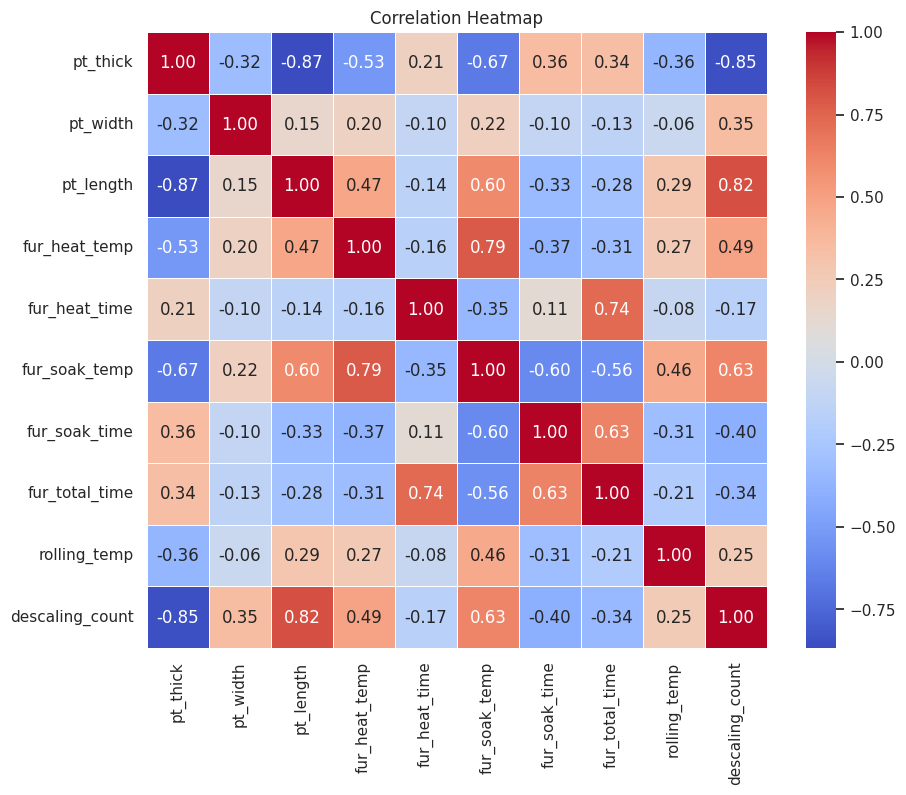

In [ ]:
import seaborn as sns

numerical_df = plate.select_dtypes(include=['number'])

correlation_matrix = numerical_df.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5, fmt = '.2f')
plt.title('Correlation Heatmap')
plt.show()

- fur_soak_temp와 fur_heat_temp, fur_heat_time과 fur_total_time, pt_length와 descaling_count 간에 높은 양의 상관관계가 나타남
- pt_thick과 descaling_count, pt_length와 pt_thick 간에 높은 음의 상관관계가 나타남

# scale와 각각의 hist

-  pt_thick, pt_width, pt_length, fur_heat_temp, fur_heat_time, fur_soak_temp, fur_soak_time, fur_total_time, rolling_temp, descaling_count

1. pt_thick by Scale

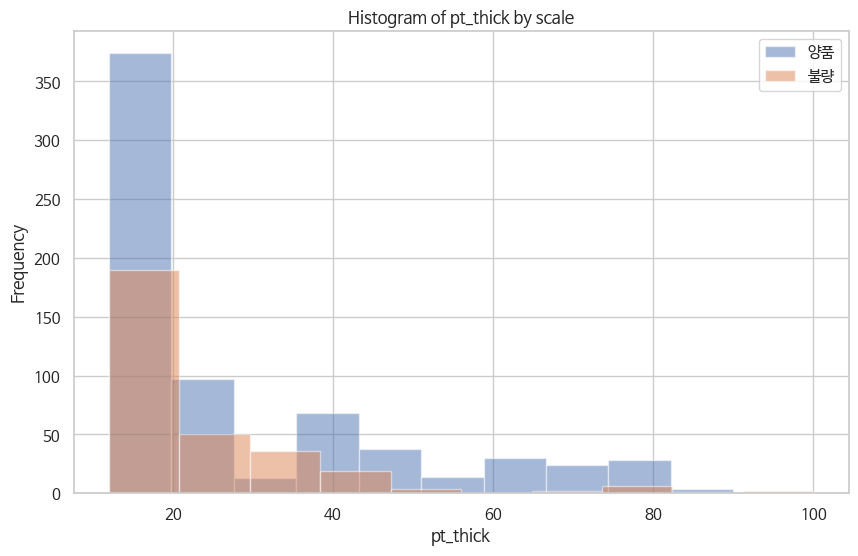

In [ ]:
plt.figure(figsize=(10, 6))
plate[plate['scale'] == '양품']['pt_thick'].hist(alpha=0.5, label='양품')
plate[plate['scale'] == '불량']['pt_thick'].hist(alpha=0.5, label='불량')
plt.title('Histogram of pt_thick by scale')
plt.xlabel('pt_thick')
plt.ylabel('Frequency')
plt.legend()
plt.show()

2. pt_width by Scale

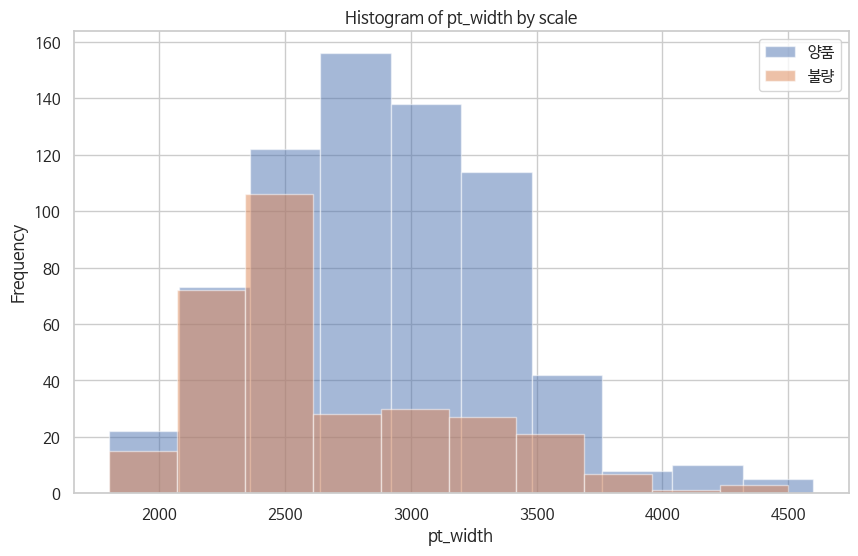

In [ ]:
plt.figure(figsize=(10, 6))
plate[plate['scale'] == '양품']['pt_width'].hist(alpha=0.5, label='양품')
plate[plate['scale'] == '불량']['pt_width'].hist(alpha=0.5, label='불량')
plt.title('Histogram of pt_width by scale')
plt.xlabel('pt_width')
plt.ylabel('Frequency')
plt.legend()
plt.show()

3. pt_length by Scale

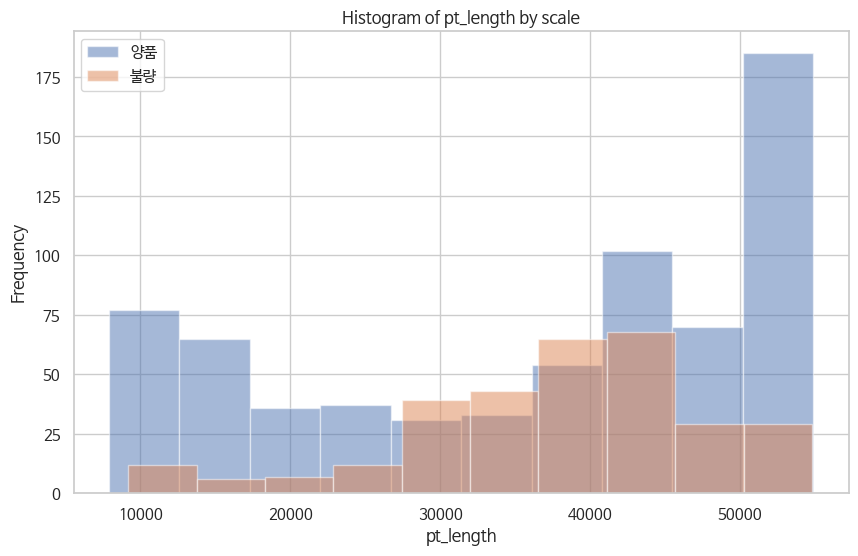

In [ ]:
plt.figure(figsize=(10, 6))
plate[plate['scale'] == '양품']['pt_length'].hist(alpha=0.5, label='양품')
plate[plate['scale'] == '불량']['pt_length'].hist(alpha=0.5, label='불량')
plt.title('Histogram of pt_length by scale')
plt.xlabel('pt_length')
plt.ylabel('Frequency')
plt.legend()
plt.show()

4.  fur_heat_temp by Scale

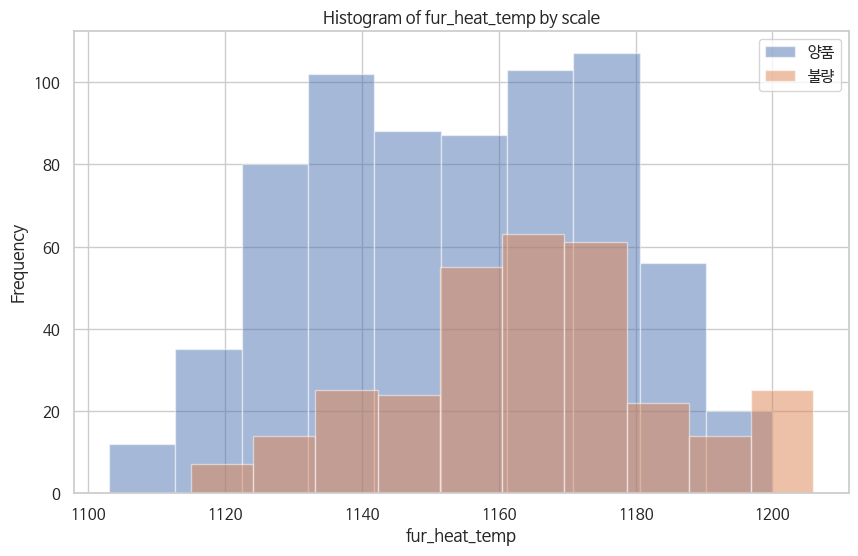

In [ ]:
plt.figure(figsize=(10, 6))
plate[plate['scale'] == '양품']['fur_heat_temp'].hist(alpha=0.5, label='양품')
plate[plate['scale'] == '불량']['fur_heat_temp'].hist(alpha=0.5, label='불량')
plt.title('Histogram of fur_heat_temp by scale')
plt.xlabel('fur_heat_temp')
plt.ylabel('Frequency')
plt.legend()
plt.show()

5. fur_heat_time by scale

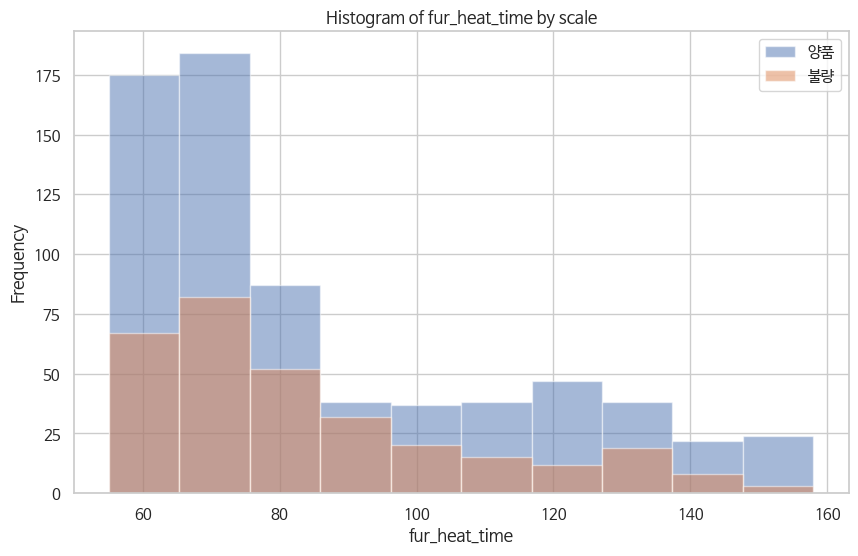

In [ ]:
plt.figure(figsize=(10, 6))
plate[plate['scale'] == '양품']['fur_heat_time'].hist(alpha=0.5, label='양품')
plate[plate['scale'] == '불량']['fur_heat_time'].hist(alpha=0.5, label='불량')
plt.title('Histogram of fur_heat_time by scale')
plt.xlabel('fur_heat_time')
plt.ylabel('Frequency')
plt.legend()
plt.show()

6. fur_soak_temp by scale

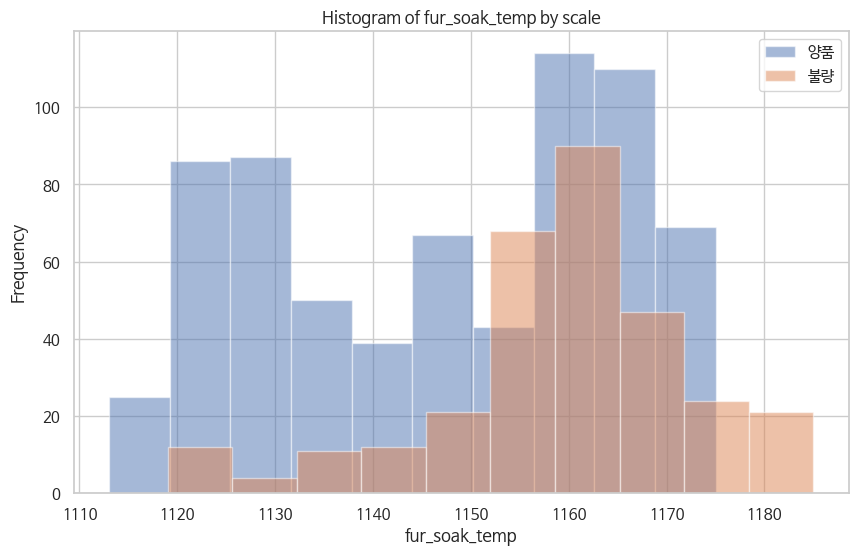

In [ ]:
plt.figure(figsize=(10, 6))
plate[plate['scale'] == '양품']['fur_soak_temp'].hist(alpha=0.5, label='양품')
plate[plate['scale'] == '불량']['fur_soak_temp'].hist(alpha=0.5, label='불량')
plt.title('Histogram of fur_soak_temp by scale')
plt.xlabel('fur_soak_temp')
plt.ylabel('Frequency')
plt.legend()
plt.show()

7. fur_soak_time by scale

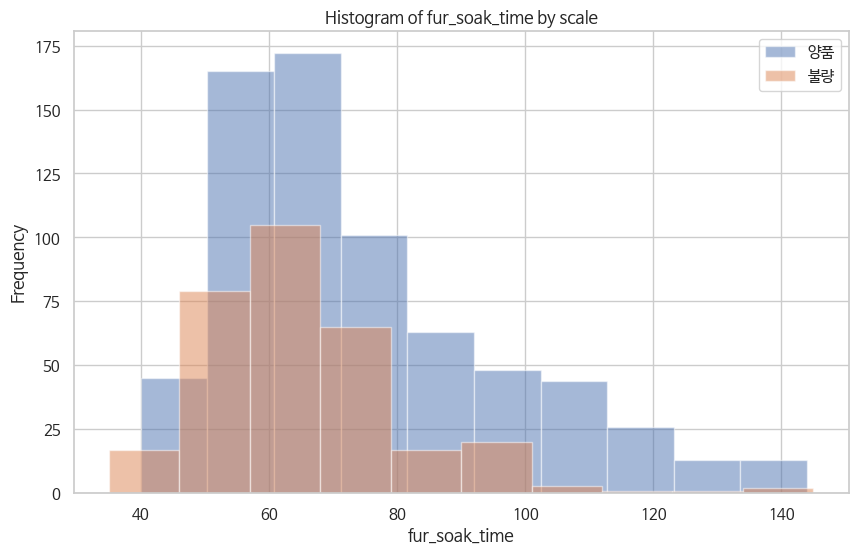

In [ ]:
plt.figure(figsize=(10, 6))
plate[plate['scale'] == '양품']['fur_soak_time'].hist(alpha=0.5, label='양품')
plate[plate['scale'] == '불량']['fur_soak_time'].hist(alpha=0.5, label='불량')
plt.title('Histogram of fur_soak_time by scale')
plt.xlabel('fur_soak_time')
plt.ylabel('Frequency')
plt.legend()
plt.show()

8. fur_total_time by scale

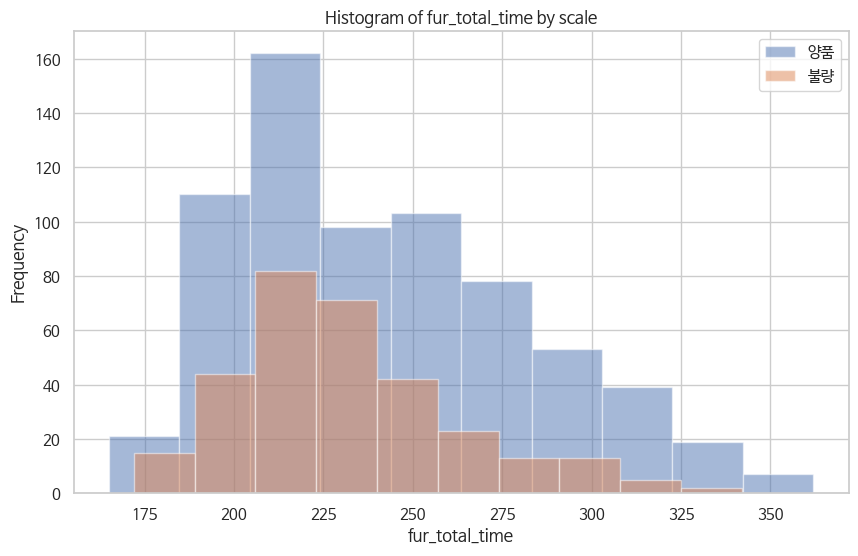

In [ ]:
plt.figure(figsize=(10, 6))
plate[plate['scale'] == '양품']['fur_total_time'].hist(alpha=0.5, label='양품')
plate[plate['scale'] == '불량']['fur_total_time'].hist(alpha=0.5, label='불량')
plt.title('Histogram of fur_total_time by scale')
plt.xlabel('fur_total_time')
plt.ylabel('Frequency')
plt.legend()
plt.show()

9. rolling_temp by scale

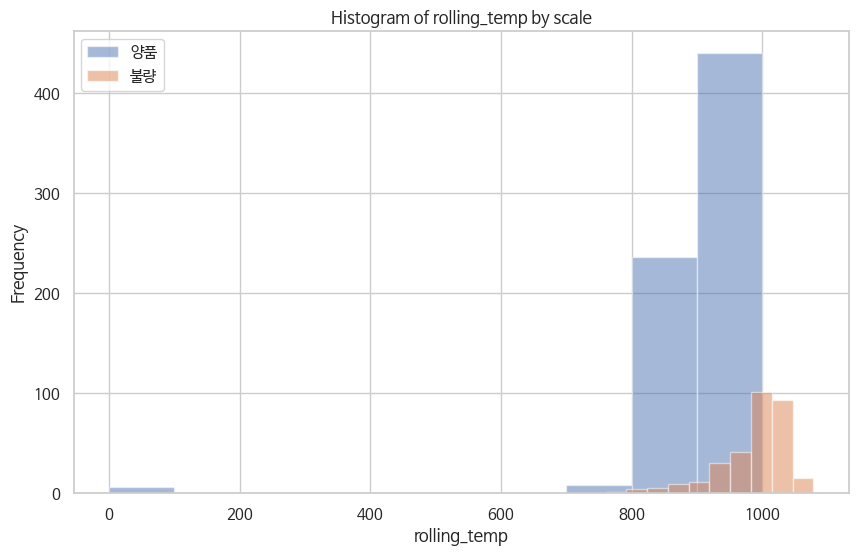

In [ ]:
plt.figure(figsize=(10, 6))
plate[plate['scale'] == '양품']['rolling_temp'].hist(alpha=0.5, label='양품')
plate[plate['scale'] == '불량']['rolling_temp'].hist(alpha=0.5, label='불량')
plt.title('Histogram of rolling_temp by scale')
plt.xlabel('rolling_temp')
plt.ylabel('Frequency')
plt.legend()
plt.show()

- 이상치가 발견되어 제거 필요함

In [ ]:
plate[plate['rolling_temp'] <= 400]['rolling_temp']

,rolling_temp
53,0
221,0
222,0
598,0
599,0
600,0


10. descaling_count by scale

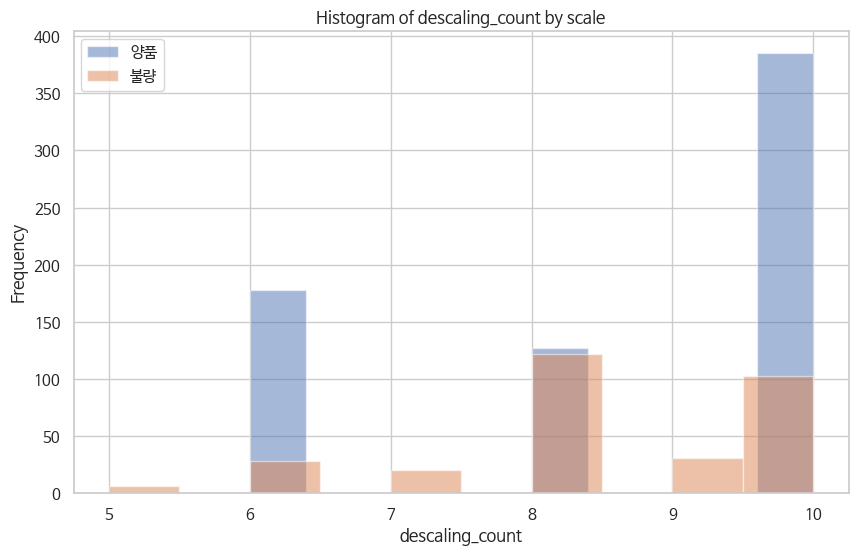

In [ ]:
plt.figure(figsize=(10, 6))
plate[plate['scale'] == '양품']['descaling_count'].hist(alpha=0.5, label='양품')
plate[plate['scale'] == '불량']['descaling_count'].hist(alpha=0.5, label='불량')
plt.title('Histogram of descaling_count by scale')
plt.xlabel('descaling_count')
plt.ylabel('Frequency')
plt.legend()
plt.show()

## rolling_temp 이상치 제거

In [ ]:
plate.drop(plate[plate['rolling_temp']==0].index, inplace=True)

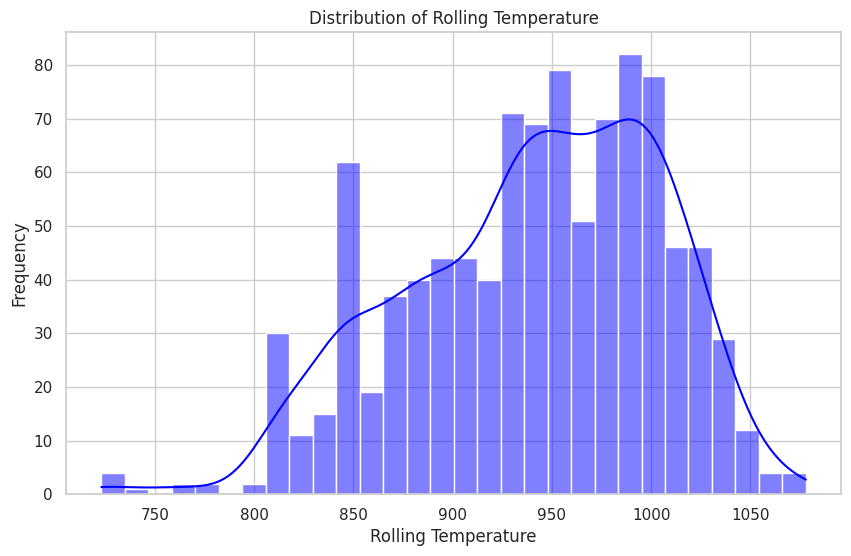

In [ ]:
### 이상치 제거 후 분포 확인###

sns.set(style="whitegrid")

plt.figure(figsize=(10, 6))
sns.histplot(plate['rolling_temp'].dropna(), bins=30, kde=True, color='blue')
plt.title('Distribution of Rolling Temperature')
plt.xlabel('Rolling Temperature')
plt.ylabel('Frequency')
plt.show()

## boxplot으로 연속형 변수의 분포 파악

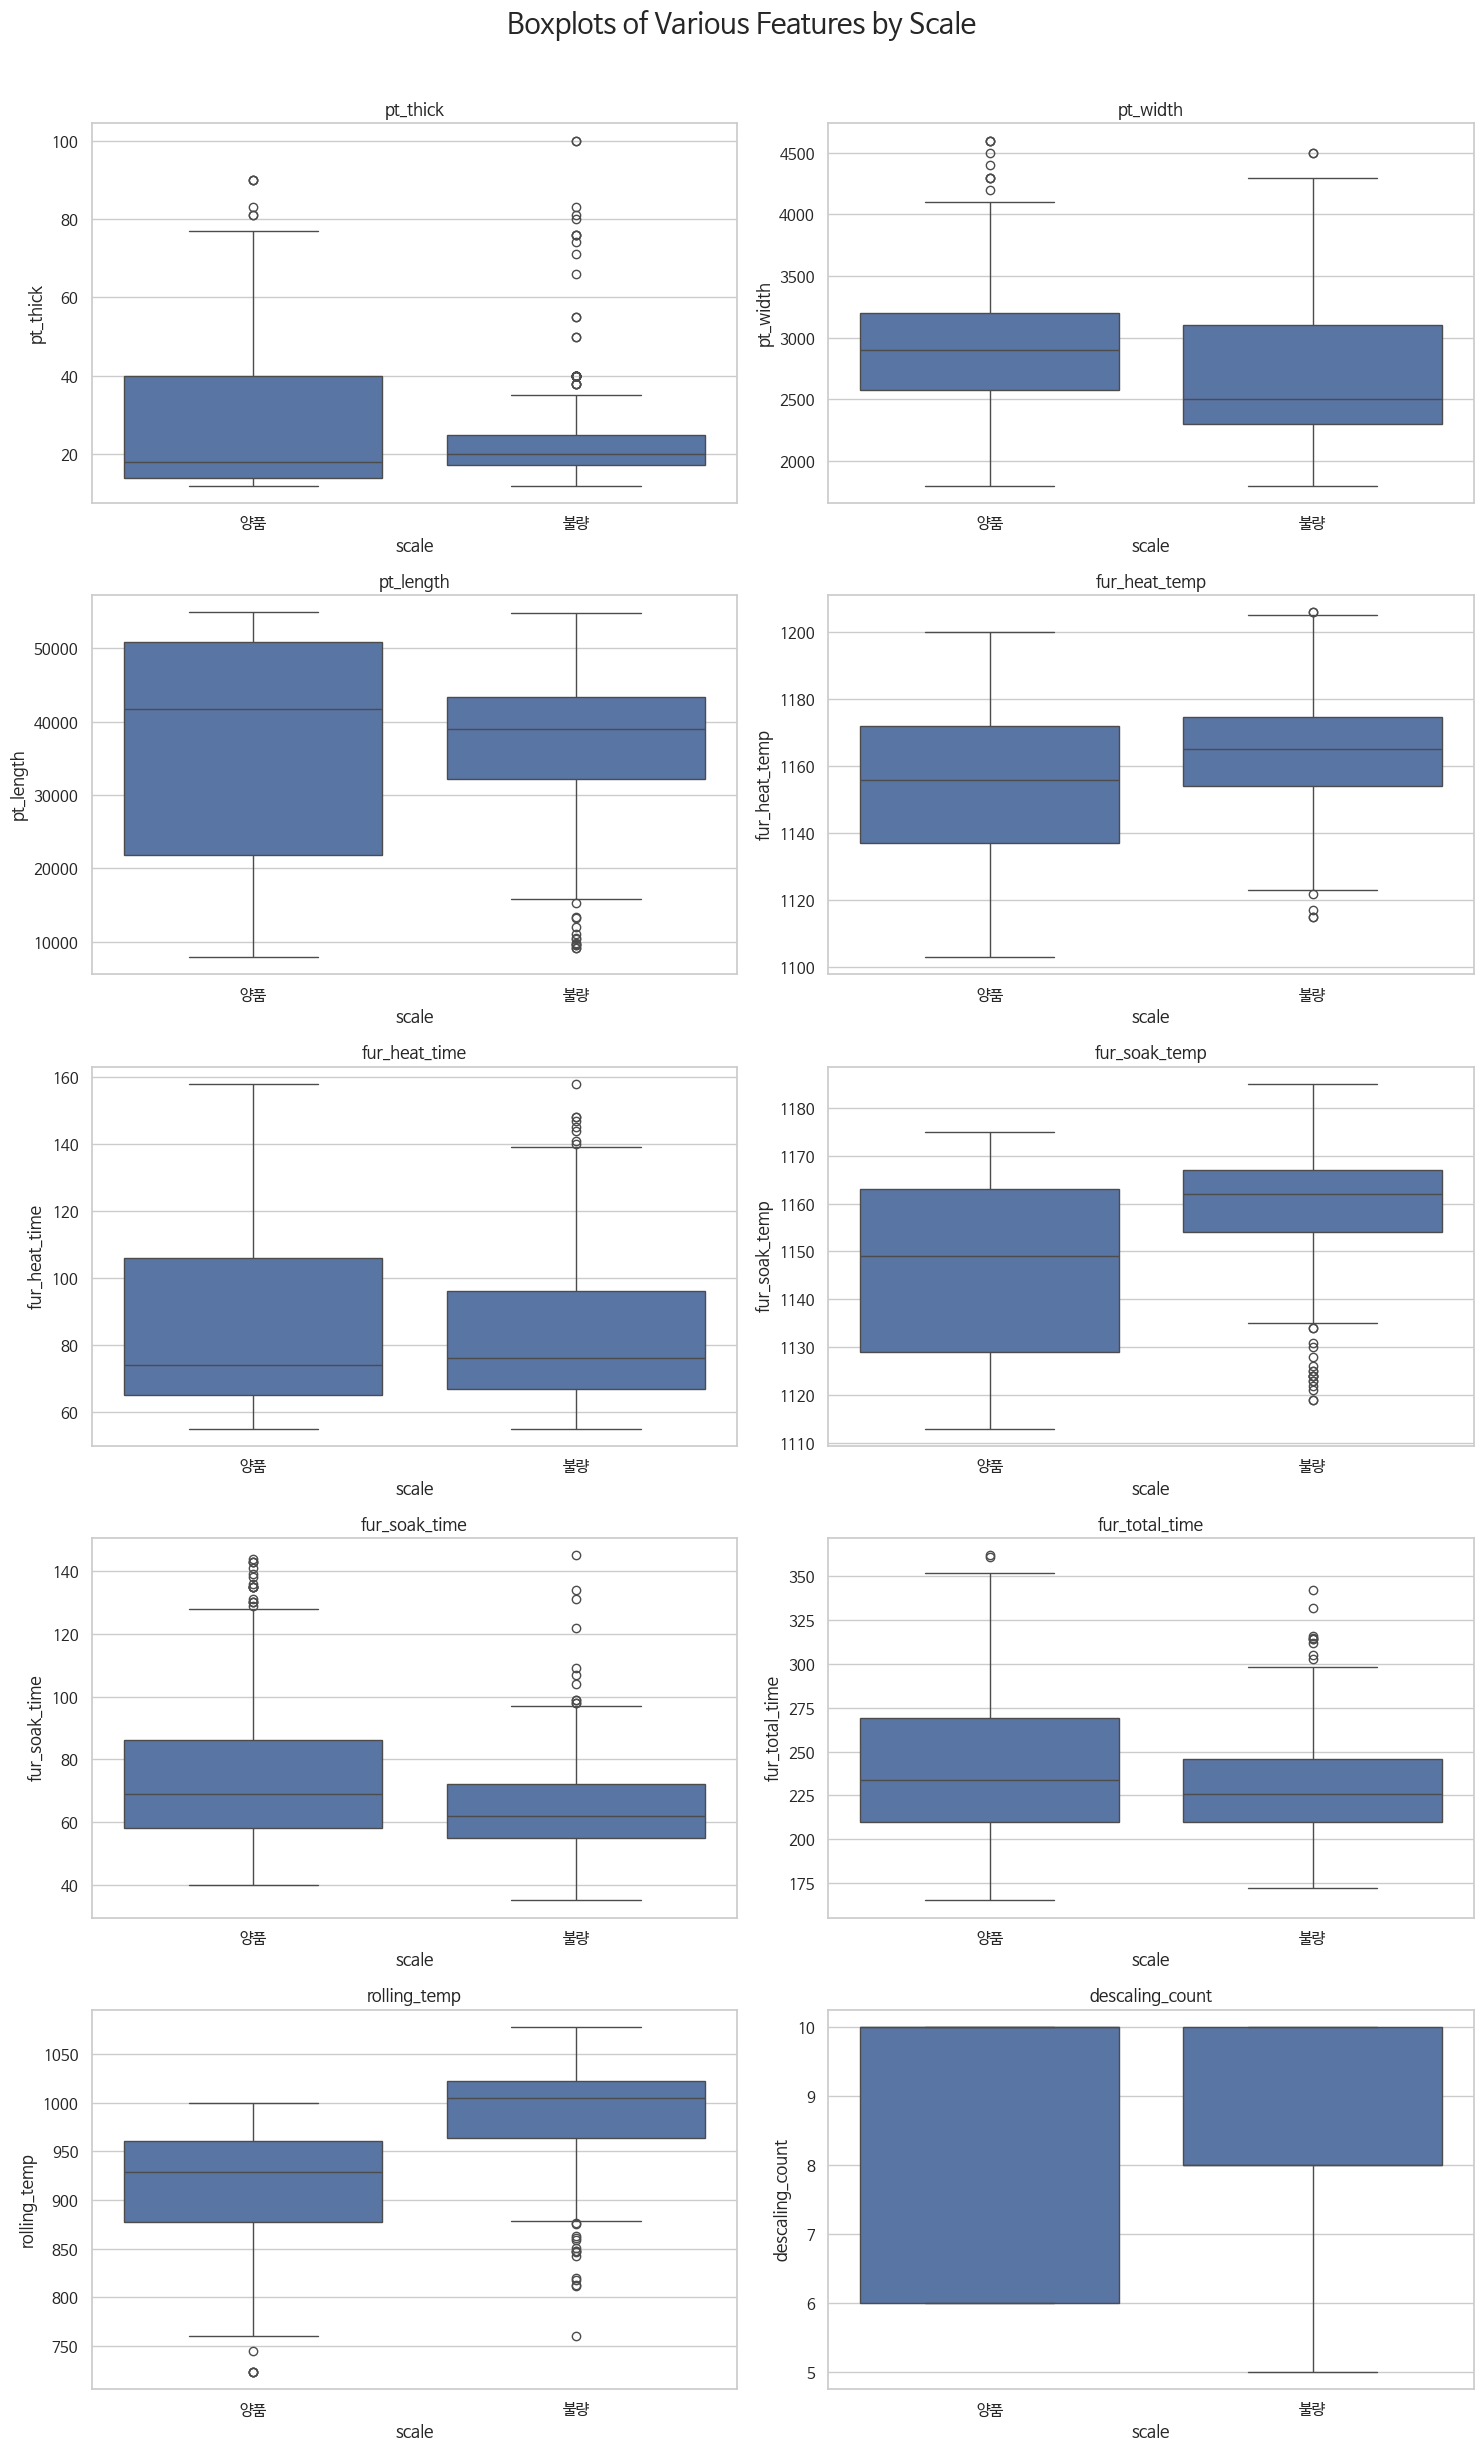

In [ ]:
columns_to_plot = [
    'pt_thick', 'pt_width', 'pt_length', 'fur_heat_temp', 'fur_heat_time',
    'fur_soak_temp', 'fur_soak_time', 'fur_total_time', 'rolling_temp', 'descaling_count'
]

# Create a figure with subplots
fig, axes = plt.subplots(nrows=5, ncols=2, figsize=(15, 25))
fig.suptitle('Boxplots of Various Features by Scale', fontsize=20)

# Iterate over the columns and corresponding axes to plot
for ax, column in zip(axes.flatten(), columns_to_plot):
    sns.boxplot(x='scale', y=column, data=plate, ax=ax)
    ax.set_title(f'{column}')

plt.tight_layout(rect=[0, 0, 1, 0.97])
plt.show()

## fur_heat_time과 fur_soak_time 제거

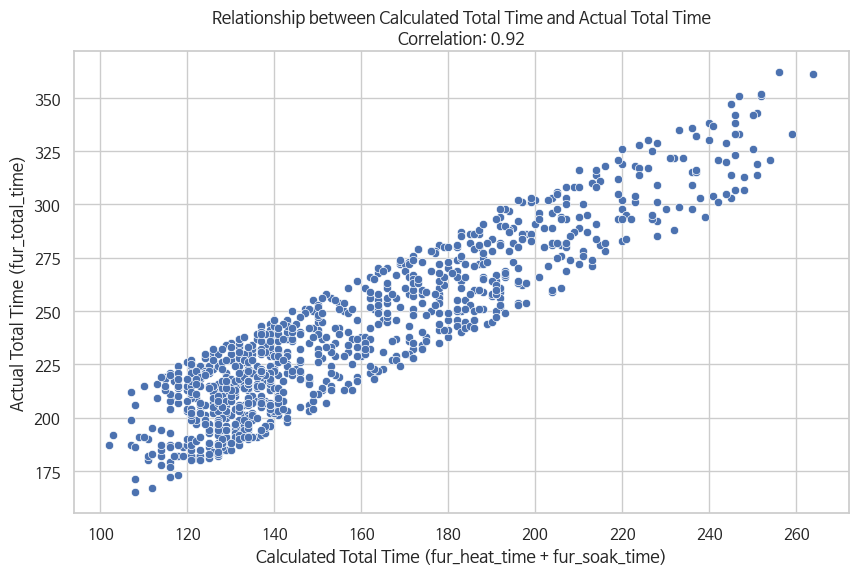

(0.9202324878998849, 0.0)

In [ ]:
from scipy.stats import pearsonr

correlation, p_value = pearsonr(plate['fur_heat_time'] + plate['fur_soak_time'], plate['fur_total_time'])

plt.figure(figsize=(10, 6))
sns.scatterplot(x=plate['fur_heat_time'] + plate['fur_soak_time'], y='fur_total_time', data=plate)
plt.title(f'Relationship between Calculated Total Time and Actual Total Time\nCorrelation: {correlation:.2f}')
plt.xlabel('Calculated Total Time (fur_heat_time + fur_soak_time)')
plt.ylabel('Actual Total Time (fur_total_time)')
plt.show()

correlation, p_value

높은 상관관계를 보이기에, fur_heat_time과 fur_soak_time을 제거하고, fur_total_time으로만 사용

## steel_kind별 scale여부 시각화

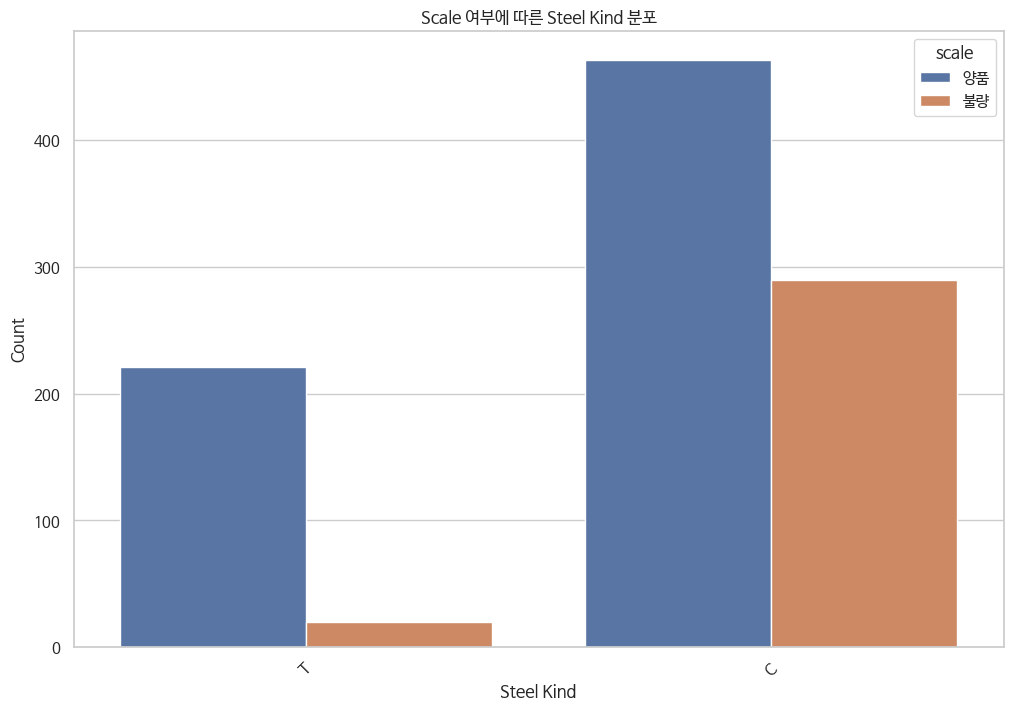

In [ ]:
plt.figure(figsize=(12, 8))
sns.countplot(data=plate, x='steel_kind', hue='scale')
plt.title('Scale 여부에 따른 Steel Kind 분포')
plt.xlabel('Steel Kind')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

티타늄(T)에서의 불량률보다 탄소강(C)에서의 불량률이 월등하게 높음

## Hsb별 범주형 변수 분포 파악

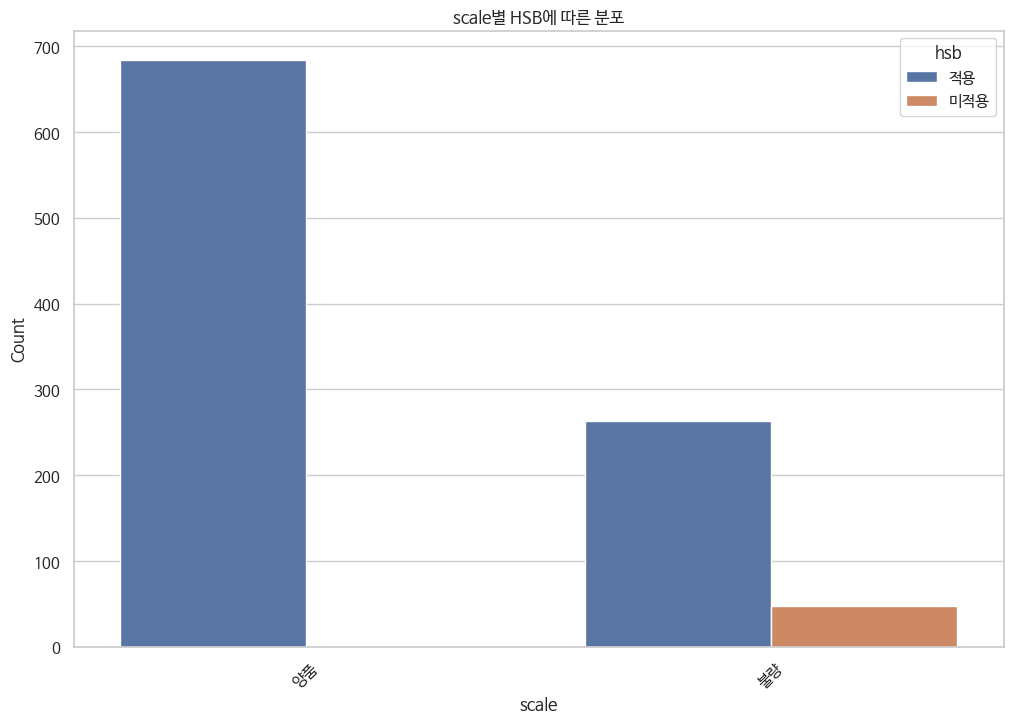

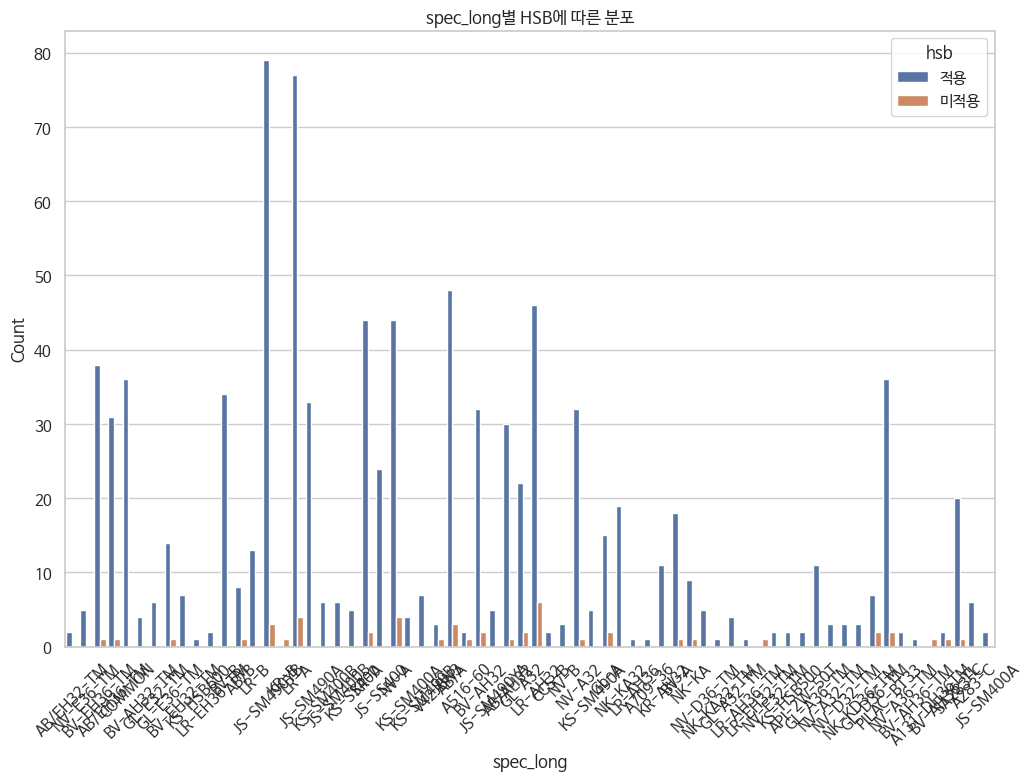

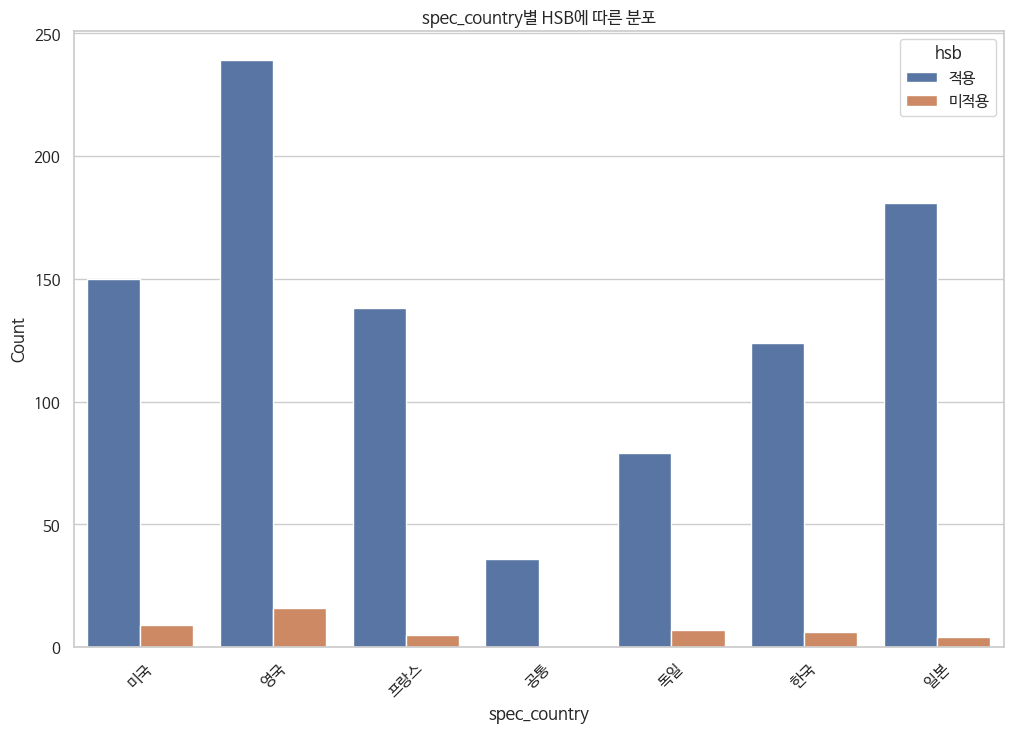

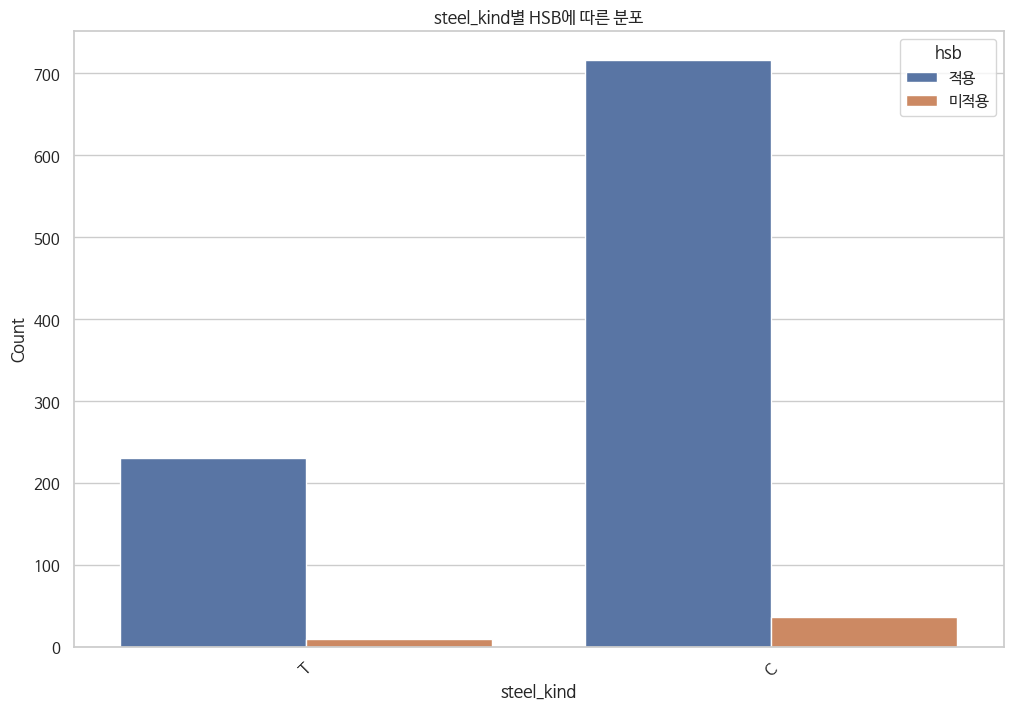

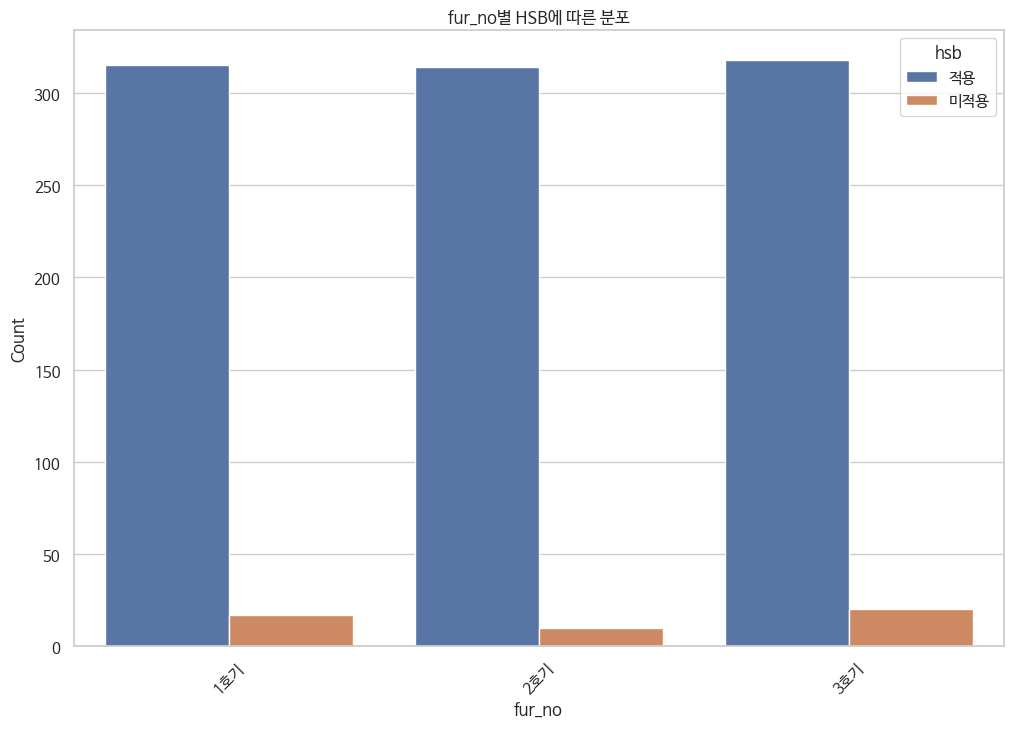

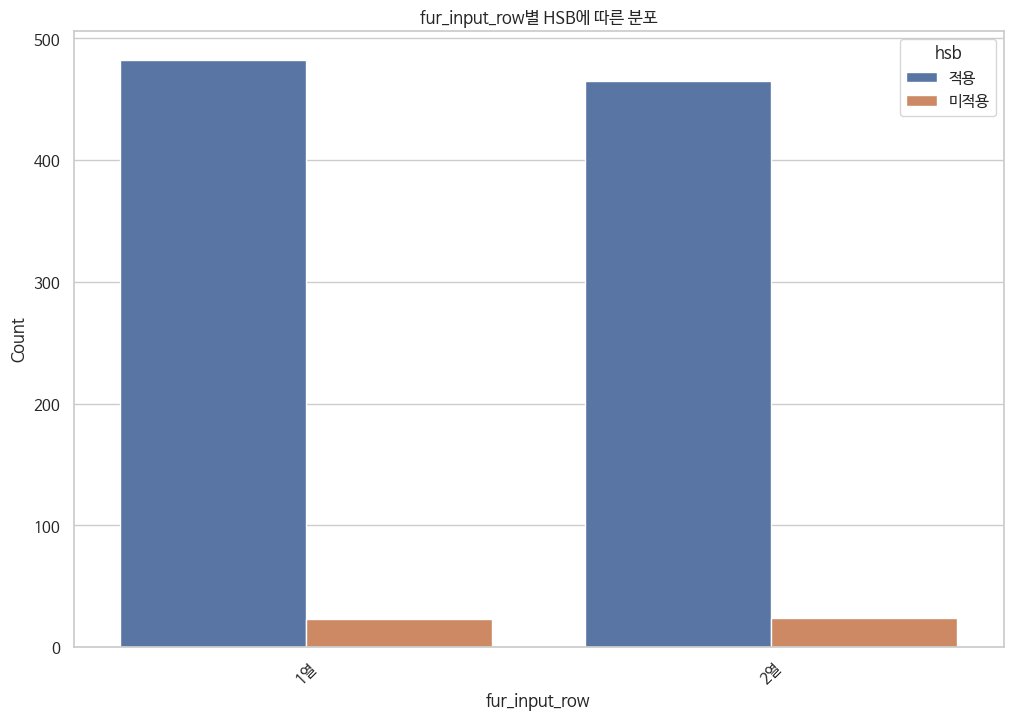

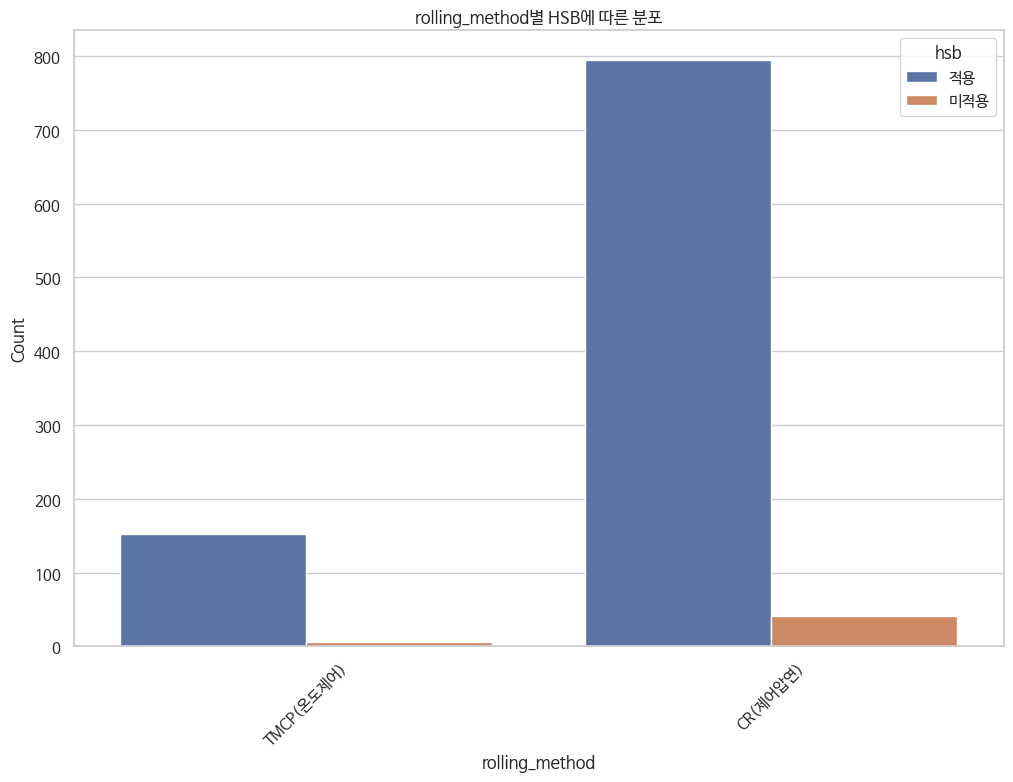

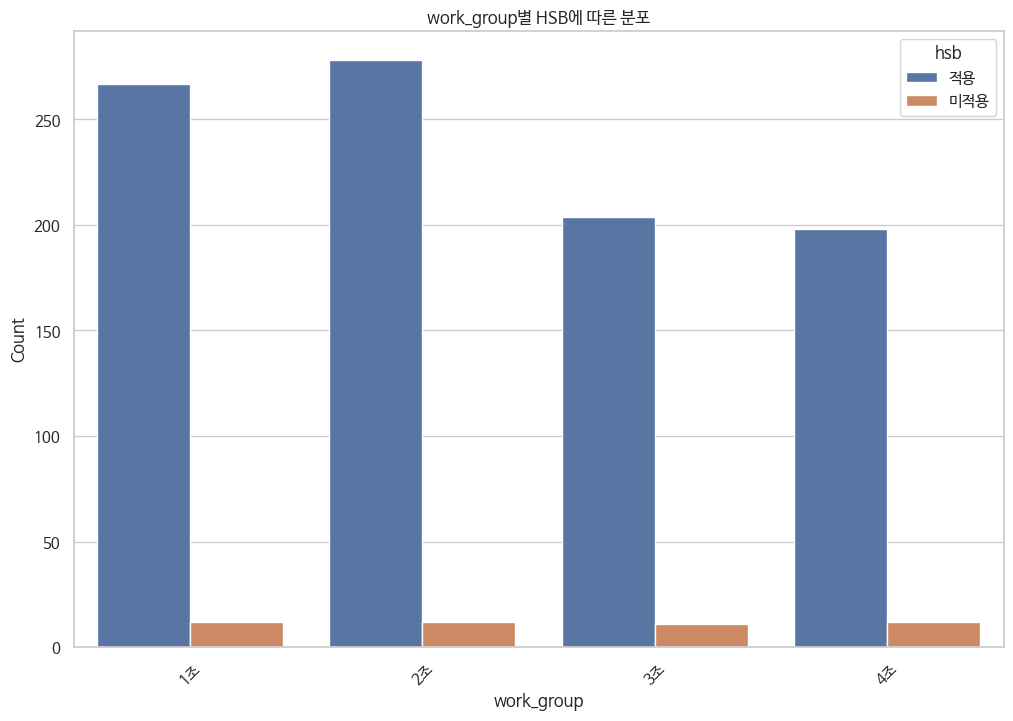

In [ ]:
categorical_columns = ['scale', 'spec_long',
                       'spec_country', 'steel_kind', 'fur_no',
                       'fur_input_row', 'rolling_method', 'work_group']

for column in categorical_columns:
    plt.figure(figsize=(12, 8))
    sns.countplot(x=column, hue='hsb', data=plate)
    plt.title(f'{column}별 HSB에 따른 분포')
    plt.xlabel(column)
    plt.ylabel('Count')
    plt.xticks(rotation=45)
    plt.show()

## 파생변수 'fur_avg_temp' 생성

- fur_avg_temp = (fur_heat_temp+ fur_soak_temp)/2
- 파생변수 생성 후, 'fur_heat_temp'와 'fur_soak_temp' 제거



In [ ]:
plate['fur_avg_temp'] = plate[['fur_heat_temp', 'fur_soak_temp']].mean(axis=1)

total_time_index = plate.columns.get_loc('fur_total_time')
columns = list(plate.columns)
columns.insert(total_time_index, columns.pop(columns.index('fur_avg_temp')))
plate = plate[columns]

plate.drop(columns = ['fur_heat_temp', 'fur_soak_temp'], axis=1, inplace=True)

<ipython-input-218-5ff831be3ab3>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  plate.drop(columns = ['fur_heat_temp', 'fur_soak_temp'], axis=1, inplace=True)


## 분석에서 제외시킬 변수 제거

- plate_no: 분석에서 무의미한 데이터(ID) 값
- spec_long,  spec_country: 관련 도메인에 관해 탐색적으로 분석해본 결과, 분석적으로 유의미한 연관성을 찾지 못함
-  rolling_date : 시계열성이 뚜렷하지 않음
- pt_thick, pt_width, pt_length: scale 여부 시각화를 해봤을 때, 양의 관계와 음의 관계를 발견하지 못함
- fur_no: scale 비율에 따른 분포 확인 결과, 유의미한 연관성를 발견하지 못함
- fur_heat_time, fur_soak_time: fur_total_time과 높은 상관성 존재

In [ ]:
plate.drop(columns = ['plate_no', 'spec_long', 'spec_country', 'rolling_date',
                      'pt_thick', 'pt_width', 'pt_length',
                      'fur_no', 'fur_input_row', 'fur_heat_time', 'fur_soak_time'],
           axis=1, inplace=True)

plate.drop(plate[plate['rolling_temp']==0].index, inplace=True)

## 전처리 완료된 최종 데이터 확인

In [ ]:
plate.head(10)

,scale,steel_kind,hsb,fur_avg_temp,fur_total_time,rolling_method,rolling_temp,descaling_count,work_group
0,양품,T,적용,1138.5,259,TMCP(온도제어),934,8,1조
1,양품,T,적용,1139.5,238,TMCP(온도제어),937,8,1조
2,양품,T,적용,1125.0,258,TMCP(온도제어),889,8,1조
3,양품,T,적용,1139.5,266,TMCP(온도제어),885,8,1조
4,양품,T,적용,1134.0,246,TMCP(온도제어),873,8,1조
5,양품,T,적용,1135.5,255,TMCP(온도제어),874,8,1조
6,양품,T,적용,1134.0,278,TMCP(온도제어),878,8,1조
7,양품,T,적용,1135.0,272,TMCP(온도제어),870,8,1조
8,양품,T,적용,1124.5,241,TMCP(온도제어),873,8,1조
9,불량,T,적용,1129.5,290,TMCP(온도제어),881,7,1조


In [ ]:
plate.info()

<class 'pandas.core.frame.DataFrame'>
Index: 994 entries, 0 to 999
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   scale            994 non-null    object 
 1   steel_kind       994 non-null    object 
 2   hsb              994 non-null    object 
 3   fur_avg_temp     994 non-null    float64
 4   fur_total_time   994 non-null    int64  
 5   rolling_method   994 non-null    object 
 6   rolling_temp     994 non-null    int64  
 7   descaling_count  994 non-null    int64  
 8   work_group       994 non-null    object 
dtypes: float64(1), int64(3), object(5)
memory usage: 77.7+ KB


#### steel_kind(강종)을 기준으로 층별화하기 위해 2개의 파일로 나눠서 저장함

In [ ]:
plate_c = plate[plate['steel_kind'] == 'C']
plate_t = plate[plate['steel_kind'] == 'T']

In [ ]:
plate.to_csv("plate.csv", index=False)
plate_c.to_csv("plate_c.csv", index=False)
plate_t.to_csv("plate_t.csv", index=False)